In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [122]:
# for converting into polynomial features
# poly = PolynomialFeatures(degree)
# X = poly.fit_transform(X) 

from sklearn.preprocessing import PolynomialFeatures

In [123]:
# for the minimising function
from scipy.optimize import minimize

# for reading MATLAB files
from scipy.io import loadmat

In [124]:
# alternative minimize function
import scipy.optimize as opt 

In [125]:
# alternate learning models
from sklearn.linear_model import LinearRegression, Ridge

In [126]:
# part 1

In [256]:
# load data
path = "D:\Programming\TestData\ex5data1.mat"

data = loadmat(path) # for loading data from matlab files

In [257]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

In [258]:
X, y, Xtest, ytest, Xval, yval = data['X'], data['y'], data['Xtest'], data['ytest'], data['Xval'], data['yval']

In [259]:
X.shape, y.shape, Xtest.shape, ytest.shape, Xval.shape, yval.shape

((12, 1), (12, 1), (21, 1), (21, 1), (21, 1), (21, 1))

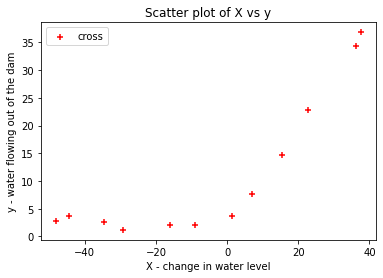

In [260]:
# plotting X and y

plt.scatter(X, y, label='cross', color='red', marker='+', s=40)

plt.xlabel('X - change in water level')
plt.ylabel('y - water flowing out of the dam')
plt.title('Scatter plot of X vs y')
plt.legend()

plt.show()

In [261]:
def linearRegCostFunction(theta, X, y, learningRate):
    """
    X is (m,n+1) - including intercept column of 1s
    y is (m,n)
    theta is (n+1,1)
    """
    m = X.shape[0]
    hTheta = np.dot(X, theta) # X * theta => (m,n+1) * (n+1,1) => (m,1) => y
    
    
    # regularized cost calculation
    # ============================
    # intercept term is not regularized
    # i.e. theta[1]...onwards, ignoring theta[0]
    # here shape of theta need not be retained since end result cost is scalar
    regTerm = (learningRate / (2 * m)) * np.sum(np.square(theta[1:])) # theta[1]...onwards, ignoring theta[0]
    cost = (1 / (2 * m)) * np.sum(np.square(hTheta-y)) + regTerm

    # regularized gradient calculation
    # ================================
    # intercept term is not regularized
    theta[0] = 0
    # here shape of theta need is retained since end result gradients is not scalar
    regTerm = (learningRate / m) * theta # here shape of theta is retained since end result grad is shape of theta
    grad = (1 / m) * np.dot(X.T, (hTheta - y)) + regTerm # (n+1,m) * (m,1) =>(n+1,1) => same as theta
        
    return cost, grad

In [262]:
# add intercept term to X i.e. 1's column to X matrix

X = np.c_[np.ones((X.shape[0], 1)), X]
# using this method to avoid problems in the matrix multipications within the minimizing function

X.shape

(12, 2)

In [263]:
# add intercept term to Xval i.e. 1's column to Xval matrix

Xval = np.c_[np.ones((Xval.shape[0], 1)), Xval]
# using this method to avoid problems in the matrix multipications within the minimizing function

Xval.shape

(21, 2)

In [264]:
# test cost function
theta = np.matrix([[1],[1]])
learningRate = 1
cost, grad = linearRegCostFunction(theta, X, y, learningRate)

# expected cost 303.993192, expected gradient [-15.303016; 598.250744]
cost, grad

(303.9931922202643,
 matrix([[-15.30301567],
         [598.25074417]]))

In [265]:
# learning function using scipy optimizations

def trainLinearRegression(X, y, learningRate):
    
    initialTheta = np.zeros((X.shape[1],1))
    result = opt.fmin_tnc(func = linearRegCostFunction, x0 = initialTheta, args = (X, y.flatten(), learningRate))
    
    parameters = result[0]
    
    parameters = parameters.reshape((X.shape[1],1))
    # converting array to matrix of desired shape
    
    return parameters

In [266]:
# train linear model with learningRate = 0
learningRate = 0
parameters = trainLinearRegression(X, y, learningRate)

In [267]:
parameters, parameters.shape

(array([[10.04370303],
        [ 0.33633648]]),
 (2, 1))

In [268]:
# plot the learned fit
def plotFit(parameters, X, y):
    
    plt.scatter(X[:,1:], y, label='cross', color='red', marker='+', s=40)
    plt.plot(np.linspace(-40,40), (parameters[0]+ (parameters[1] * np.linspace(-40,40))), label='Scipy optimize')

    plt.xlabel('X - change in water level')
    plt.ylabel('y - water flowing out of the dam')
    plt.title('Scatter plot of X vs y')
    plt.legend()

    plt.show()
    
    return


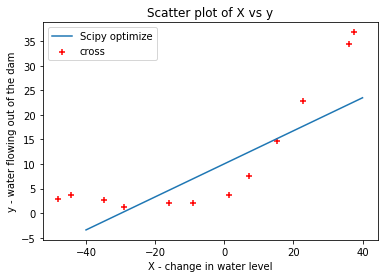

In [269]:
# plot
plotFit(parameters, X, y)

In [270]:
# return 'errors' needed to plot learning curves

def learningCurveErrors(X, y, Xval, yval, learningRate):
    
    m = X.shape[0]
    
    trainingError = np.zeros((m,1))
    validationError = np.zeros((m,1))
    
    print('X.shape = ', X.shape)
    print('Xval.shape = ', Xval.shape)
    
    for i in range(m):
        
        # take different training subsets
        Xtrain = X[:i+1]
        ytrain = y[:i+1]
        
        # for each subset compute params, compute error on each training subset
        # error is computed with lambda at zero
        theta = trainLinearRegression(Xtrain, ytrain, learningRate)
        trainingError[i],_ = linearRegCostFunction(theta, Xtrain, ytrain, 0)
        
        # for params computed on each training subset, compute error on complete validation set
        # error is computed with lambda at zero
        validationError[i],_ = linearRegCostFunction(theta, Xval, yval, 0)
                    
    
    return trainingError, validationError

In [271]:
# compute training error, validation error
learningRate = 0
trainingError, validationError = learningCurveErrors(X, y, Xval, yval, learningRate)

X.shape =  (12, 2)
Xval.shape =  (21, 2)


In [272]:
trainingError.shape, validationError.shape

((12, 1), (12, 1))

In [273]:
# plotting learning curves using 'errors' from above
# basic curve plotting

def plotCurve(trainingError, validationError):
    
    plt.plot(range(1,13), trainingError, label = 'Training error')
    plt.plot(range(1,13), validationError, label = 'Validation error')
    plt.title('Learning curves')
    plt.xlabel('number of samples')
    plt.ylabel('Error')
    plt.legend()
    
    return

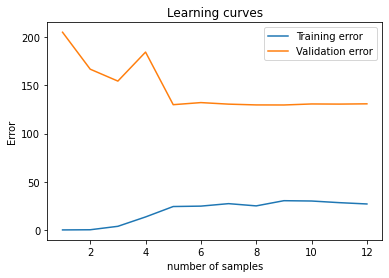

In [274]:
# trial of basic curve plotting
plotCurve(trainingError, validationError)

In [275]:
# for converting into polynomial features using sklearn.preprocessing.PolynomialFeatures 
# fit_transform also scales the features; 
# no need of separate feature normalizing/scaling

# fit_transform also adds 1s column

# don't transform xTest - that's for end testing

def convertPoly(X, Xval, degree):
    
    poly = PolynomialFeatures(degree)
    # use fit_transform to polynomalize and scale X
    XPoly = poly.fit_transform(X.reshape(-1,1))
    
    # use trasnform to polynomalize and scale Xval, using the mu, sigma from fit_transform of Xtrain
    XvalPoly  = poly.transform(Xval.reshape(-1,1))
    
    return XPoly, XvalPoly


In [276]:
# bring it all together for different X, learninRates

def plotLearningCurves(X, y, Xval, yval, learningRate):
    
    trainingError, validationError = learningCurveErrors(X, y, Xval, yval, learningRate)
    plotCurve(trainingError, validationError)
    
    return

X.shape =  (12, 2)
Xval.shape =  (21, 2)


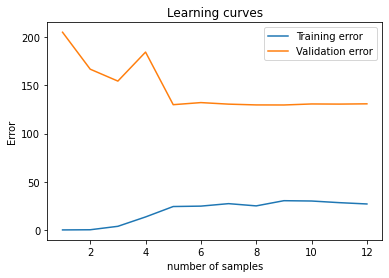

In [277]:
# playing around
# try learnig curves for different learningRates
learningRate = 0

plotLearningCurves(X, y, Xval, yval, learningRate)

X.shape =  (12, 2)
Xval.shape =  (21, 2)


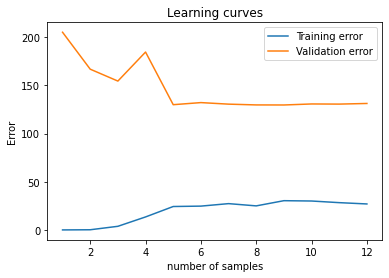

In [278]:
learningRate = 1

plotLearningCurves(X, y, Xval, yval, learningRate)

X.shape =  (12, 2)
Xval.shape =  (21, 2)


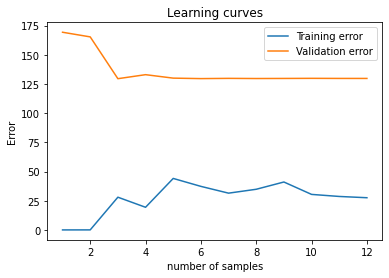

In [279]:
learningRate = 1000

plotLearningCurves(X, y, Xval, yval, learningRate)

In [280]:
# part 2

In [298]:
X, y, Xtest, ytest, Xval, yval = data['X'], data['y'], data['Xtest'], data['ytest'], data['Xval'], data['yval']

In [299]:
X.shape, Xval.shape, Xtest.shape

((12, 1), (21, 1), (21, 1))

In [300]:
X[:,0], Xval[:,0] #testing to see that 1s column is not present

(array([-15.93675813, -29.15297922,  36.18954863,  37.49218733,
        -48.05882945,  -8.94145794,  15.30779289, -34.70626581,
          1.38915437, -44.38375985,   7.01350208,  22.76274892]),
 array([-16.74653578, -14.57747075,  34.51575866, -47.01007574,
         36.97511905, -40.68611002,  -4.47201098,  26.53363489,
        -42.7976831 ,  25.37409938, -31.10955398,  27.31176864,
         -3.26386201,  -1.81827649, -40.7196624 , -50.01324365,
        -17.41177155,   3.5881937 ,   7.08548026,  46.28236902,
         14.61228909]))

In [301]:
XtrainPoly, XvalPoly = convertPoly(X, Xval, degree = 8)

In [302]:
XtrainPoly.shape, XvalPoly.shape # 9 features including intercept 1s column

((12, 9), (21, 9))

In [303]:
#testing to see that 1s column is inserted
XtrainPoly[:,0], XtrainPoly[:,1], XvalPoly[:,0], XvalPoly[:,1] 

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([-15.93675813, -29.15297922,  36.18954863,  37.49218733,
        -48.05882945,  -8.94145794,  15.30779289, -34.70626581,
          1.38915437, -44.38375985,   7.01350208,  22.76274892]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.]),
 array([-16.74653578, -14.57747075,  34.51575866, -47.01007574,
         36.97511905, -40.68611002,  -4.47201098,  26.53363489,
        -42.7976831 ,  25.37409938, -31.10955398,  27.31176864,
         -3.26386201,  -1.81827649, -40.7196624 , -50.01324365,
        -17.41177155,   3.5881937 ,   7.08548026,  46.28236902,
         14.61228909]))

In [304]:
def predict(X, theta):
    
    X = np.matrix(X)
    theta = np.matrix(theta)
    
    # assuming X has 1s inserted
    # assuming X is (m,n+1), theta is (n+1,1)
        
    return X * theta    

In [305]:
def plotPolyFit(parameters, degree):
    
    x = np.linspace(X.min(), X.max(), 100)    
    
    poly = PolynomialFeatures(degree)
    x_poly = poly.fit_transform(np.matrix(x).T)    
    
    h = predict(x_poly, parameters)

    fig, ax = plt.subplots(figsize=(6,4))

    ax.plot(X, y, 'mx', label='Training data')
    ax.plot(x, h, 'b-', label='Polynomial model')

    ax.legend()
    ax.set_xlabel('Change in water level (x)')
    ax.set_ylabel('Water flowing out of the dam (y)')
    
    return

In [306]:
# train with poly features and plot the resulting curve
# bring it all together

def trainPlotPolyFit(X, y, degree, learningRate):
    
    poly = PolynomialFeatures(degree)    
    XPoly = poly.fit_transform(X.reshape(-1,1))
    parameters = trainLinearRegression(XPoly, y, learningRate)
    
    plotPolyFit(parameters, degree)
    
    return

In [307]:
# train with different polynomial degrees and learningRates
# observe fit of resulting plots

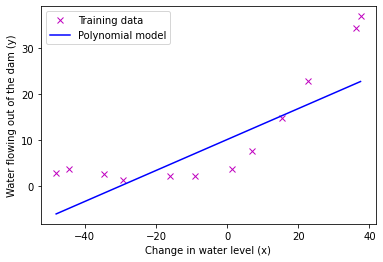

In [308]:
# degree = 1, learningRate = 0
trainPlotPolyFit(X, y, 1, 0)

# original X, and original straight line fit

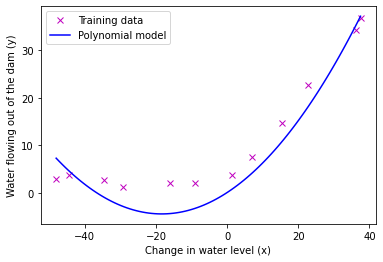

In [309]:
# degree = 2, learningRate = 0
trainPlotPolyFit(X, y, 2, 0)

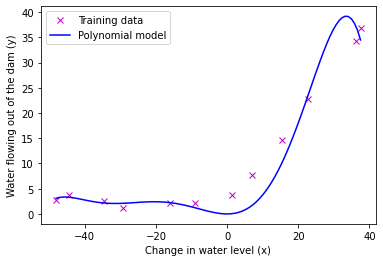

In [310]:
# degree = 6, learningRate = 0
trainPlotPolyFit(X, y, 6, 0)

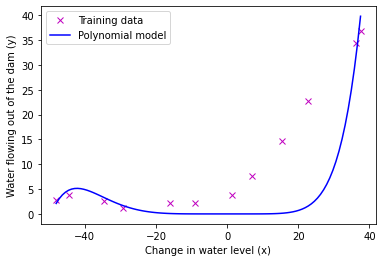

In [311]:
# degree = 8, learningRate = 0
trainPlotPolyFit(X, y, 8, 0)

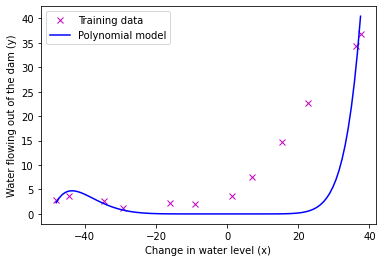

In [312]:
# degree = 10, learningRate = 0
trainPlotPolyFit(X, y, 10, 0)

In [246]:
# try learningCurves for poly features

In [315]:
# degree = 8
XtrainPoly.shape, XvalPoly.shape # 9 features including intercept 1s column

((12, 9), (21, 9))

X.shape =  (12, 9)
Xval.shape =  (21, 9)


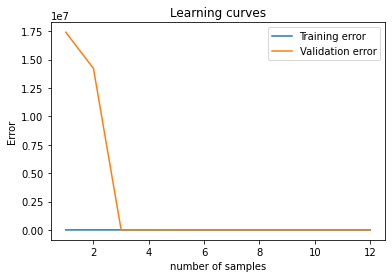

In [317]:
learningRate = 0

plotLearningCurves(XtrainPoly, y, XvalPoly, yval, learningRate)

In [318]:
# degree = 2
XtrainPoly, XvalPoly = convertPoly(X, Xval, degree = 2)

In [319]:
XtrainPoly.shape, XvalPoly.shape # 3 features including intercept 1s column

((12, 3), (21, 3))

X.shape =  (12, 3)
Xval.shape =  (21, 3)


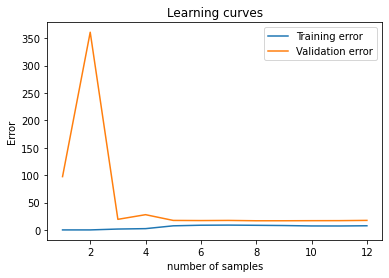

In [320]:
learningRate = 0

plotLearningCurves(XtrainPoly, y, XvalPoly, yval, learningRate)

In [322]:
# degree = 4
XtrainPoly, XvalPoly = convertPoly(X, Xval, degree = 4)
XtrainPoly.shape, XvalPoly.shape # 5 features including intercept 1s column

((12, 5), (21, 5))

X.shape =  (12, 5)
Xval.shape =  (21, 5)


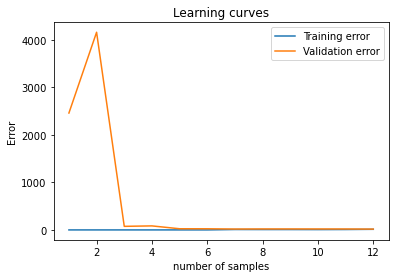

In [324]:
learningRate = 1

plotLearningCurves(XtrainPoly, y, XvalPoly, yval, learningRate)

C:\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.35663e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


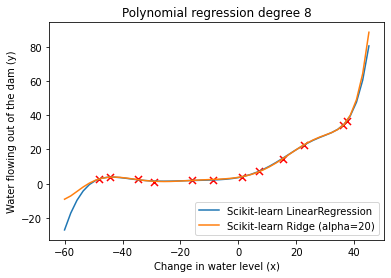

In [45]:
# playing around
# using learning methods from sklearn.linear_model

regr2 = LinearRegression()
regr2.fit(XtrainPoly, y)

regr3 = Ridge(alpha=20)
regr3.fit(XtrainPoly, y)

# plot range for x
plot_x = np.linspace(-60,45)

# using coefficients to calculate y
plot_y  = regr2.intercept_ + np.sum(regr2.coef_ * poly.fit_transform(plot_x.reshape(-1,1)), axis = 1)
plot_y2 = regr3.intercept_ + np.sum(regr3.coef_ * poly.fit_transform(plot_x.reshape(-1,1)), axis = 1)

plt.plot(plot_x, plot_y, label='Scikit-learn LinearRegression')
plt.plot(plot_x, plot_y2, label='Scikit-learn Ridge (alpha={})'.format(regr3.alpha))
plt.scatter(X, y, s=50, c='r', marker='x', linewidths=1)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Polynomial regression degree 8')
plt.legend(loc=4);